# Import Library

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import mediapipe as mp

# Keypoint MediaPipe Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

# Plot Keypoint Value with Cam

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

c:\Users\akmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

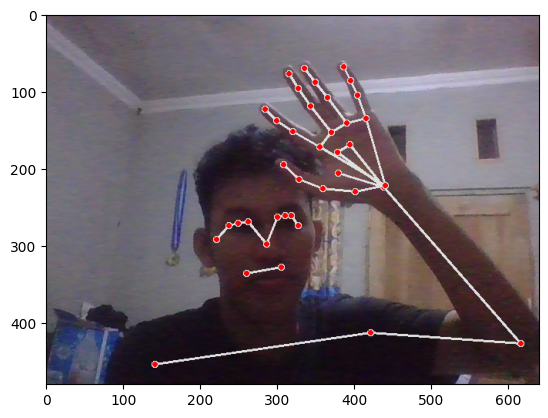

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoint Values

In [10]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [11]:
pose

array([ 4.47852224e-01,  6.21606886e-01, -8.33271801e-01,  9.99965489e-01,
        4.69166368e-01,  5.48181772e-01, -7.60298908e-01,  9.99915123e-01,
        4.84533846e-01,  5.45579731e-01, -7.59958684e-01,  9.99912620e-01,
        4.97986138e-01,  5.43960631e-01, -7.59467125e-01,  9.99897361e-01,
        4.10832167e-01,  5.61597884e-01, -7.80939162e-01,  9.99931335e-01,
        3.89142543e-01,  5.66634417e-01, -7.80159712e-01,  9.99927700e-01,
        3.71547639e-01,  5.71421683e-01, -7.80436695e-01,  9.99919236e-01,
        5.12043476e-01,  5.72713733e-01, -3.53455305e-01,  9.99923825e-01,
        3.45686793e-01,  6.09056115e-01, -4.32091653e-01,  9.99960601e-01,
        4.78017628e-01,  6.85280979e-01, -6.85471177e-01,  9.99935567e-01,
        4.06988800e-01,  7.00661898e-01, -7.08202541e-01,  9.99955356e-01,
        6.58016562e-01,  8.62178862e-01, -1.95253521e-01,  9.99493301e-01,
        2.21218035e-01,  9.47506011e-01, -2.66930312e-01,  9.96488988e-01,
        9.63790715e-01,  

In [12]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [13]:
result_test = extract_keypoints(results)

In [14]:
result_test

array([ 4.47852224e-01,  6.21606886e-01, -8.33271801e-01,  9.99965489e-01,
        4.69166368e-01,  5.48181772e-01, -7.60298908e-01,  9.99915123e-01,
        4.84533846e-01,  5.45579731e-01, -7.59958684e-01,  9.99912620e-01,
        4.97986138e-01,  5.43960631e-01, -7.59467125e-01,  9.99897361e-01,
        4.10832167e-01,  5.61597884e-01, -7.80939162e-01,  9.99931335e-01,
        3.89142543e-01,  5.66634417e-01, -7.80159712e-01,  9.99927700e-01,
        3.71547639e-01,  5.71421683e-01, -7.80436695e-01,  9.99919236e-01,
        5.12043476e-01,  5.72713733e-01, -3.53455305e-01,  9.99923825e-01,
        3.45686793e-01,  6.09056115e-01, -4.32091653e-01,  9.99960601e-01,
        4.78017628e-01,  6.85280979e-01, -6.85471177e-01,  9.99935567e-01,
        4.06988800e-01,  7.00661898e-01, -7.08202541e-01,  9.99955356e-01,
        6.58016562e-01,  8.62178862e-01, -1.95253521e-01,  9.99493301e-01,
        2.21218035e-01,  9.47506011e-01, -2.66930312e-01,  9.96488988e-01,
        9.63790715e-01,  